PETR 6397 Petroleum Data Analytics

Spring 2023 Take Home Exam 1 - 02/09/2023

100 Total Points




Instructions for academic integrity for this exam:

- No collaboration is allowed. Any collaboration noticed between students or cheating of any sort will result in a grade of ZERO on the midterm for the students involved in the act!
- You may not share, disseminate, or discuss these questions with any other student in another section of this course who has not taken the exam yet; doing so is considered academic dishonesty and will lead to nullification of exam grades.
- This assessment may not be posted online or disseminated.
- There will no tolerance towards academic dishonesty, and cheating can and will lead to automatic failure from the class as well as a report to the Academic Integrity Committee.
- You must sign the statement below on academic integrity for this exam to be graded.

 
 

My signature below constitutes my pledge that I have followed University of Houston’s policy on academic integrity as well as the specific instructions for this quiz. I affirm that this exam represents my own work, without the use of any unpermitted aids or resources. I confirm that I did NOT act in such a way that would constitute cheating, misrepresentation, or unfairness, including but not limited to, using unauthorized aids and assistance, personating another person, and committing plagiarism. I understand that there will no tolerance towards academic dishonesty, and that cheating can and will lead to automatic failure from the class as well as a report to the Academic Integrity Committee.

 

 

Signature:
Rahul Krishna Gunneri
_________________________

# Exam 1

## Section 1

### Generate the following plot. There are no axis labels. There are three subplots. Each subplot has a title. Log is natural logarithm. Exp is exponential function. Sin is the trignometric sinusoidal function (sine). All subplots share the same range of X values. Each curve is red and continuous. Your plot need not be a 100% match with the one shown below. 


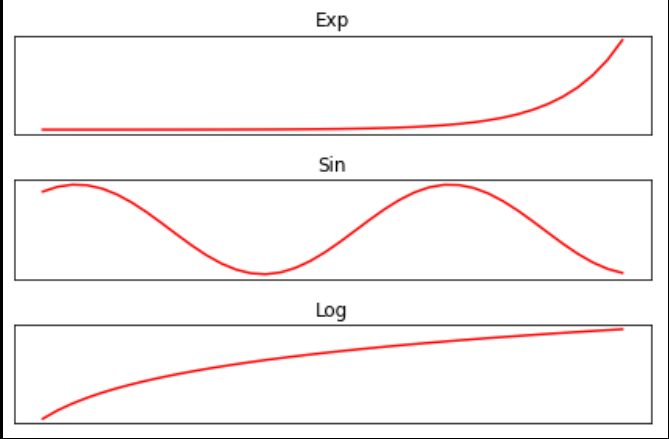


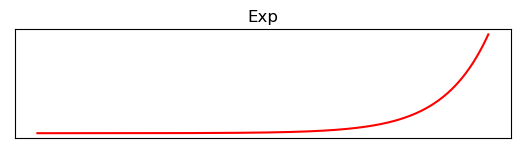

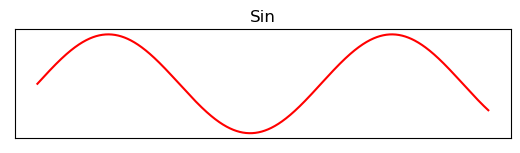

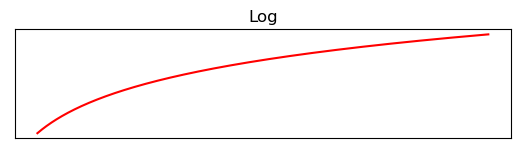

In [284]:
import math
import matplotlib.pyplot as plt
import numpy as np
l = list(np.arange (0,10,0.01))
m_1=[math.exp(X) for X in l]
m_2=[math.sin(X) for X in l]
m_3=[math.log(X) for X in l[100:]]
label=["Exp","Sin","Log"]
m=[m_1,m_2,m_3]

for i in range(len(m)):
    plt.subplot(3,1,i+1)
    if i<2:
        plt.plot(l,m[i],'r')
    else:
        plt.plot(l[100:],m[i],'r')
    plt.title(label[i])
    plt.xticks([])
    plt.yticks([])
    plt.show()

## Section 2


### Description

In this question, you will look at three bad visualizations then:

1. Identify what makes them bad
1. Use the same data to make a better chart
1. Explain an interesting pattern you noticed.

Some helpful questions to determine if a visualization is bad:

1. What is the visualization trying to show? Ex. Comparison? Relationship? Change over time?
2. Is this the right visualization to use?
3. Does the visualization have the correct labels and axes limits?
4. Is there too much being shown in one visualization? Should it be split?

Some helpful questions to find patterns in a visualization:

1. How do different data points compare? Are there significant differences? Are there any outliers?
2. If comparing data/series, how do they rank? Is there a significant difference between rankings?
3. If looking at data over time, is there any seasonality? How do the values compare to the mean and/or median? How do the values change over time? Ex. Ups and downs? Always up? Always down?


Don't forget the matplotlib documentation available from the Help menu in the notebook.

## Answer:
i) the line chart is the comparison between four different products over a year 2016 by dividing into 4 quarters.
ii) Yes, the line chart visualisation is the correct method to use for this kind of data.
iii) No, as there is proper labelling of particular product to differentiate and no labelling for the axis.
iv) Yes, all the products data has been shown in the single line chart, which leads to the confusion for easy understanding.

### Problem 1: Bad line chart (15 points)

To get you started, we'll walk through 1 bad visualization.

![Bad Line Chart](http://imgur.com/kB6uNZC.png)

In [285]:
# Bad line chart data & names
badLineNames = ["2016 Q1", "2016 Q2", "2016 Q3", "2016 Q4"]
badLineProduct1 = [240, 300, 280, 400]
badLineProduct2 = [300, 320, 150, 160]
badLineProduct3 = [120, 140, 180, 160]
badLineProduct4 = [380, 400, 450, 500]

**What makes this visualization bad?**

**1. What is the visualization trying to show? Ex. Comparison? Relationship? Change over time?**

This visualization trys to show data over time.

**2. Is this the right visualization to use?**

Yes, we should be using a line chart to show data over time.

**3. Does the visualization have the correct labels and axes limits?**

There are no labels or a title. We could also use some more space between the min and maximum data points and the axes limits.

**4. Is there too much being shown in one visualization? Should it be split?**

Yes, it's quite difficult to follow each series, it should be split.


Since the chart type is the correct one, it seems all we need to do is add labels and split the lines into panels. Before we do that, we can probably also improve the design. We covered how to improve a `matplotlib` plot in class using different styles. Select a `style` and apply it below.

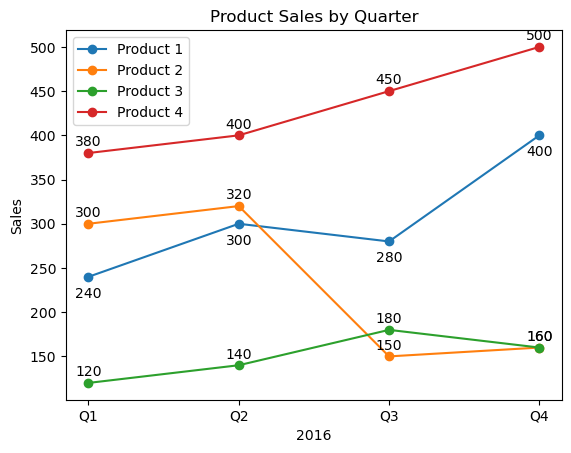

In [286]:
## Apply your chosen style here
x = range(len(badLineNames))
products = [badLineProduct1, badLineProduct2, badLineProduct3, badLineProduct4]
label_list=[x.split(' ')[-1] for x in badLineNames]
plt.plot(x, badLineProduct1, marker='o', label='Product 1')
plt.plot(x, badLineProduct2, marker='o', label='Product 2')
plt.plot(x, badLineProduct3, marker='o', label='Product 3')
plt.plot(x, badLineProduct4, marker='o', label='Product 4')

plt.xticks(x, label_list)
plt.xlabel('2016')
plt.ylabel('Sales')
plt.title('Product Sales by Quarter')
plt.legend()
for i, j in zip(x, products[0]):
    plt.annotate(str(j), (i, j), textcoords='offset points', xytext=(0,-15), ha='center')
for idx in range(1,len(products)):
    for i, j in zip(x, products[idx]):
        plt.annotate(str(j), (i, j), textcoords='offset points', xytext=(0,5), ha='center')
plt.show()


Now we need to plot the data over different panels. We can use [`plt.subplots`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplots) to create multiple panels. Since we have 4 products, we're going to need 4 panels on top of each other. `subplots` returns two variables, the figure object and an array of axes. What we can do is loop through each Axes object and create a plot for that product. The first Axes object should plot the first product, the second should plot the second product and so on.

Here are the steps you should follow:

1. Create 4 line charts on top of each other, each plotting one of the products
1. Make sure all the y scales are the same. You can set the y scale using `set_ylim` on the Axes object. Consider adding some buffer between the lowest value and the start of the y axis as well as between the highest value and the end of the y axis.
1. Remove the x labels for all panels except the bottom one
1. Add a title to each of the plots with the product number
1. Add a title to the figure
1. Calculate either the mean or median of the entire data set and add a dashed line on each panel with that value

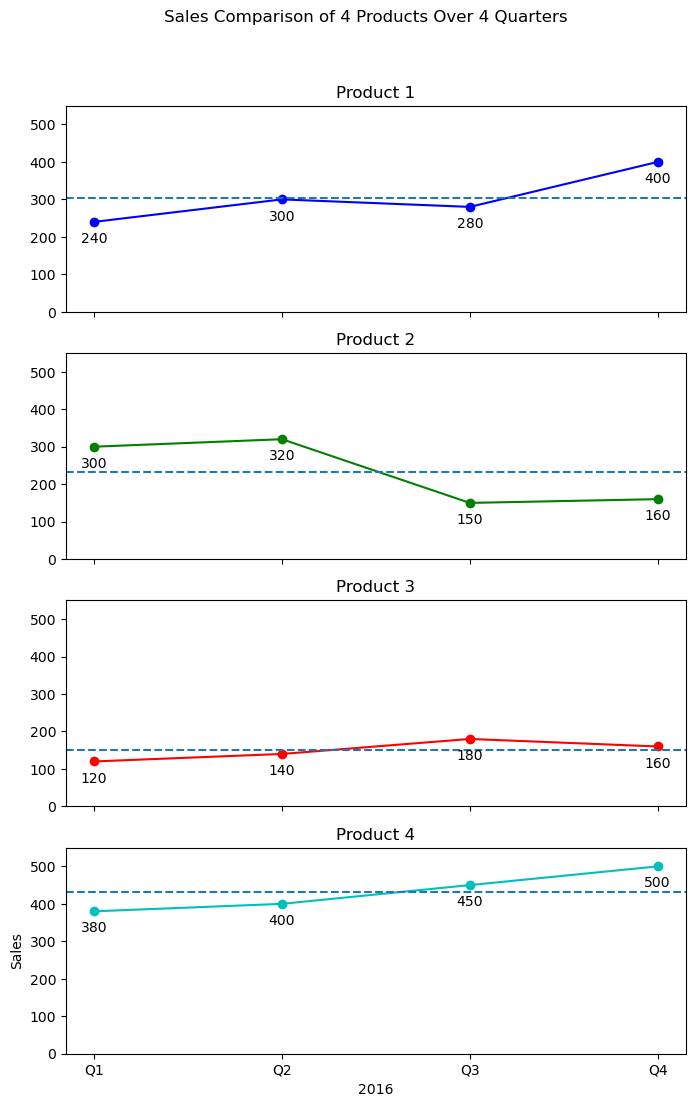

In [287]:

colors_list=['b','g','r','c']
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(8, 12))

for i, ax in enumerate(axes):
    ax.plot(label_list, products[i], marker='o',color=colors_list[i])
    ax.set_ylim(0, 500*1.1)
    ax.set_title(f'Product {i+1}')
    ax.axhline(y=sum(products[i])/len(products[i]), linestyle='--')
    for i, j in zip(x, products[i]):
        ax.annotate(str(j), (i, j), textcoords='offset points', xytext=(0,-15), ha='center')
    axes[i].set_ylabel('Sales')
    axes[i].set_xlabel('2016')
   
plt.suptitle('Sales Comparison of 4 Products Over 4 Quarters')
plt.subplots_adjust(top=0.9)

plt.show()

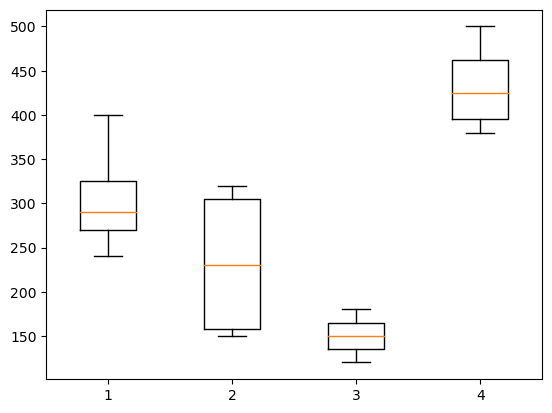

In [288]:
plt.boxplot(products)
plt.show()

Now that you've created a better plot, try to describe a pattern in the dataset. Use the following questions as a reference:

1. How do different data points compare? Are there significant differences? Are there any outliers?
2. If comparing data/series, how do they rank? Is there a significant difference between rankings?
3. If looking at data over time, is there any seasonality? How do the values compare to the mean and/or median? How do the values change over time? Ex. Ups and downs? Always up? Always down?

**Your Answer Here:**

1. 
For Product 1 and Product 4, the highest sales in Q4 and the lowest sales in Q1.
The sales of Product 4 are significantly higher than the other 3 products, with sales consistently above 400 in all 4 quarters.
There are no outliers for any of the products.

2.
If comparing the sales values of all the 4 products, we can rank them based on their values.
They are ranked in the order of:

Product 4,
Product 1, Product 2,
Product 3

There is a significant difference between the rankings, as Product 4 has consistently higher sales figures than the other 3 products, while Product 3 has the lowest sales figures. The sales figures of Product 1 and Product 2 are similar, but they still rank higher than Product 3.

In conclusion, there is a significant difference in the rankings of the 4 products based on their sales figures, with Product 4 being the highest-ranked and Product 3 being the lowest-ranked.

3.
The values of the 4 products increases over time, but the trend is not consistent for all products. From the graphs, one can indentify the sales figures of Product 4 has the highest values throughout the 4 quarters, while the values of the other 3 products fluctuate slightly. Product 1 and Product 2 have more fluctuating sales figures, with ups and downs over the 4 quarters.
<br>

### Problem 2: Bad pie chart (20 points)

Next, look through the following bad visualizations and apply the above workflow (problem 1) to:

1. Determine what makes them bad
1. Create a better visualization
1. Describe a pattern in the data

Explain why this visualization is a bad one:

![Bad Pie Chart](http://imgur.com/Wg9DOZd.png)

**Your Answer Here:**

Pie charts are never the best form of representing data. In this particular pie chart, there is no percentage information and has no details about the message it is trying to convey. It is to be noted that it is missing the title as well as share of each cities.

In [289]:
badPieNames = ["Golden", "Boulder", "Denver", "Colo Springs"]
badPieValues = [0.37, 0.4, 0.5, 0.35]

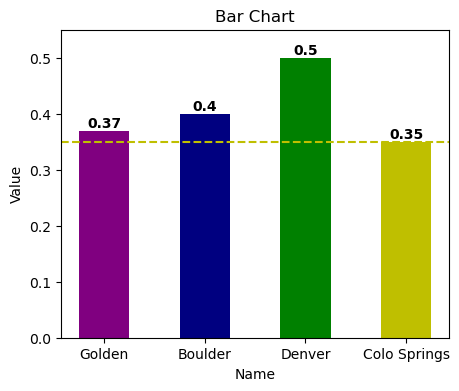

In [290]:
# Plot a better chart using this data
colors = ['purple', 'navy', 'g','y']
fig, ax = plt.subplots(figsize=(5, 4))
ax.bar(badPieNames, badPieValues,color=colors,width=0.5)
plt.ylim(0,0.55)
ax.axhline(0.35, linestyle='--',color='y')
for i, v in enumerate(badPieValues):
    ax.text(i, v, str(v), color='black', fontweight='bold', ha='center', va='bottom')
plt.xlabel("Name")
plt.ylabel("Value")
plt.title("Bar Chart")

plt.show()

Tell a story or describe a pattern using your new visualization.
<br>

**Your Answer Here:**
From the bar chart, it is clear that the highest value is held by Denver, with 0.5, while the lowest value is held by Colorado Springs with 0.35. The other two cities, Golden and Boulder, have values close to each other, with Golden having a slightly lower value at 0.37 and Boulder having a slightly higher value at 0.4. This bar chart provides a clear comparison of the values held by each of the four cities and highlights the difference in values between them.


### Problem 3: Bad bar chart 1 (20 points)

Explain why this visualization is a bad one:
Y-axis is starting from 240, it's not advised. as one can go wrong thinking it's starting from 0.
The values are not displayed on the graph.
same color for all the different categories.

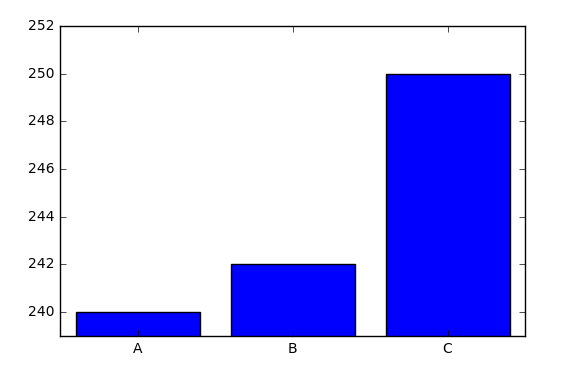

In [291]:
badBarNames = ["A", "B", "C"]
badBarValues = [240, 242, 250]

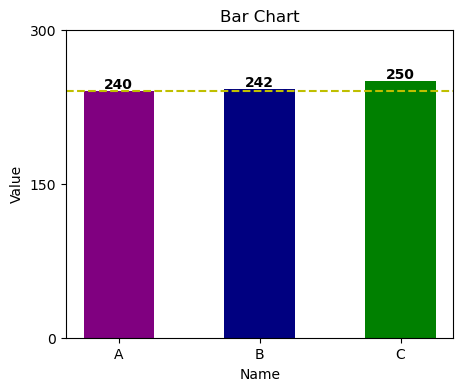

In [292]:
# Plot a better chart using this data
colors = ['purple', 'navy', 'g']
fig, ax = plt.subplots(figsize=(5, 4))
ax.bar(badBarNames, badBarValues,color=colors,width=0.5)
plt.yticks([0,150,300])
ax.axhline(240, linestyle='--',color='y')
for i, v in enumerate(badBarValues):
    ax.text(i, v, str(v), color='black', fontweight='bold', ha='center', va='bottom')
plt.xlabel("Name")
plt.ylabel("Value")
plt.title("Bar Chart")
plt.show()

Tell a story or describe a pattern using your new visualization.<br>
The bar chart represents the comparison of three values, labeled as A, B, and C. The values correspond to the height of the bars, with 240 units for A, 242 units for B, and 250 units for C.

From the visualization, it can be observed that C has the highest value, followed by B, and then A. This pattern indicates that C is the largest among the three values, while A is the smallest. The difference between C and B is relatively small, but the difference between A and C is larger.

In conclusion, the bar chart provides a clear and simple representation of the relative magnitude of the three values, making it easy to compare and understand their differences.

### Problem 4: Bad bar chart 2 (20 points)

Explain why this visualization is a bad one:
As it's time series, presenting this data with bar chart is bad idea. one need to use the line plot to represent time series data 
and values should be displayed on the graph.

![Bad Bar Chart](http://imgur.com/Ns3lgyp.png)

**Your Answer Here:**


In [293]:
badBar2Names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
badBar2Values = [240, 320, 360, 280, 290, 300, 500, 410, 390, 200, 220, 240]

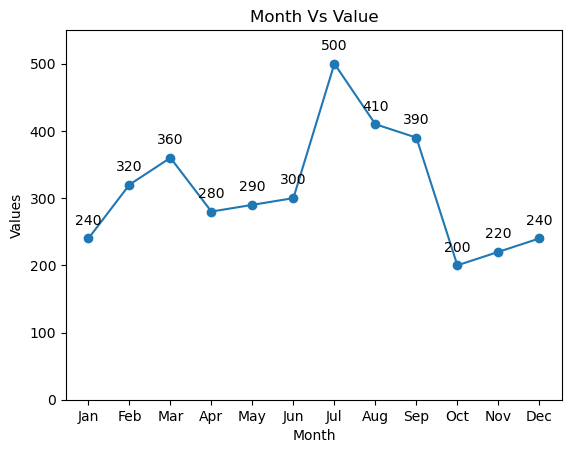

In [294]:
# Plot a better chart using this data
x=range(len(badBar2Names))
plt.plot(badBar2Names, badBar2Values, marker='o')
plt.ylim(0,550)
plt.xticks(x, badBar2Names)
plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Month Vs Value')
for i, j in zip(x, badBar2Values):
    plt.annotate(str(j), (i, j), textcoords='offset points', xytext=(0,10), ha='center')

Tell a story or describe a pattern using your new visualization:
Overall, the line graph provides a clear picture of the monthly sales trends, and it makes it easy to spot any fluctuations or patterns in the data. By analyzing this visualization, one can make informed decisions about how to adjust sales strategies, allocate resources, and plan for future growth.

## Section 3
#### <p> 1- Import and generate EDA descriptive statistics for the Core_SM.xlsx dataset <p/>
#### <p> 2- How many unique categories/classes are there in RockClass <p/>
#### <p> 3- How many samples per categories/classes are there in RockClass <p/>

In [295]:
import pandas as pd

# import the Core_SM.xlsx dataset into a Pandas DataFrame
df = pd.read_excel("Core_SM.xlsx")
df.head()

,Depth,TOC,Calcite,Porosity,Swirr,Quartz,RockClass
0,2773.88,4.389823,0.000000,7.059657,7.113304,40.625792,SS
1,2776.00,4.386618,6.364645,6.336578,9.364680,51.606889,SS
2,2778.13,3.445457,2.639268,4.697208,5.931133,41.462293,SS
3,2780.25,0.314564,67.332860,6.321279,11.776418,4.069170,LS
4,2782.48,4.059924,0.618621,5.686218,7.382626,38.091079,SS


In [296]:
df.isna().sum()

Depth        0
TOC          1
Calcite      0
Porosity     0
Swirr        0
Quartz       0
RockClass    0
dtype: int64

In [297]:
# Generate some descriptive statistics
print(df.describe())

             Depth         TOC     Calcite    Porosity        Swirr  \
count   168.000000  167.000000  168.000000  168.000000   168.000000   
mean   2952.466012    3.931429   12.740980    4.333128    18.737646   
std     106.564791    1.692516   20.678849    1.380279   102.138599   
min    2773.880000    0.314564    0.000000    0.695030     2.532676   
25%    2863.267500    2.806506    0.000000    3.536043     7.070021   
50%    2946.680000    4.030002    2.512180    4.411146    10.313979   
75%    3041.310000    5.108207   14.730751    5.172419    13.492824   
max    3147.210000    7.770700   85.867678    8.487825  1333.091287   

           Quartz  
count  168.000000  
mean    28.955931  
std     14.506839  
min      0.000000  
25%     17.419381  
50%     30.361337  
75%     40.512496  
max     62.110587  


In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Depth      168 non-null    float64
 1   TOC        167 non-null    float64
 2   Calcite    168 non-null    float64
 3   Porosity   168 non-null    float64
 4   Swirr      168 non-null    float64
 5   Quartz     168 non-null    float64
 6   RockClass  168 non-null    object 
dtypes: float64(6), object(1)
memory usage: 9.3+ KB


In [299]:
# How many unique categories/classes are there in RockClass
unique_classes = df['RockClass'].nunique()
print("Number of unique classes:", unique_classes)

Number of unique classes: 3


In [300]:
# How many samples per categories/classes are there in RockClass
samples_per_class = df['RockClass'].value_counts()
print(samples_per_class)

DO    86
SS    55
LS    27
Name: RockClass, dtype: int64
